In [1]:
import numpy as np
import sys, os, git
import pint
ureg = pint.UnitRegistry()

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+'/pyplot-perso')
sys.path.append(git_path+"/pyplot-perso/colors")
from plttools import PltTools
sys.path.append(git_path+'/scripts')
from plotting_script import scan_directory, measure_isotherm, \
    evaluate_gomc_performances, evaluate_lammps_performances, \
    predict_vapor_density

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# LAMMPS data

In [3]:
lammps_dir, lammps_mu_K = scan_directory(ureg, dir_lammps = True,
                                     binary_fluid = False)
lammps_rho_g_cm3_CO2 = measure_isotherm(lammps_dir, ["CO2"], ureg)
performance_lammps = evaluate_lammps_performances(lammps_dir, lammps_mu_K.magnitude)

# GOMC data

In [4]:
gomc_dir, gomc_mu_K = scan_directory(ureg, dir_lammps = False,
                                     binary_fluid = False)
gomc_rho_g_cm3_CO2 = measure_isotherm(gomc_dir, ["C", "O"], ureg)
performance_gomc = evaluate_gomc_performances(gomc_dir,
                                              gomc_mu_K.magnitude)

# Fit

In [5]:
fit_rho_g_cm3, fit_mu = predict_vapor_density(ureg, mu_range = np.arange(3700, 5200), molecule="CO2")

# Literature

Bulk liquid density at 300 K: approx 760 kg/m3 = 0.76 g/cm3 from Harris Yung J. Phys. Chem. 99 1995

# Plot

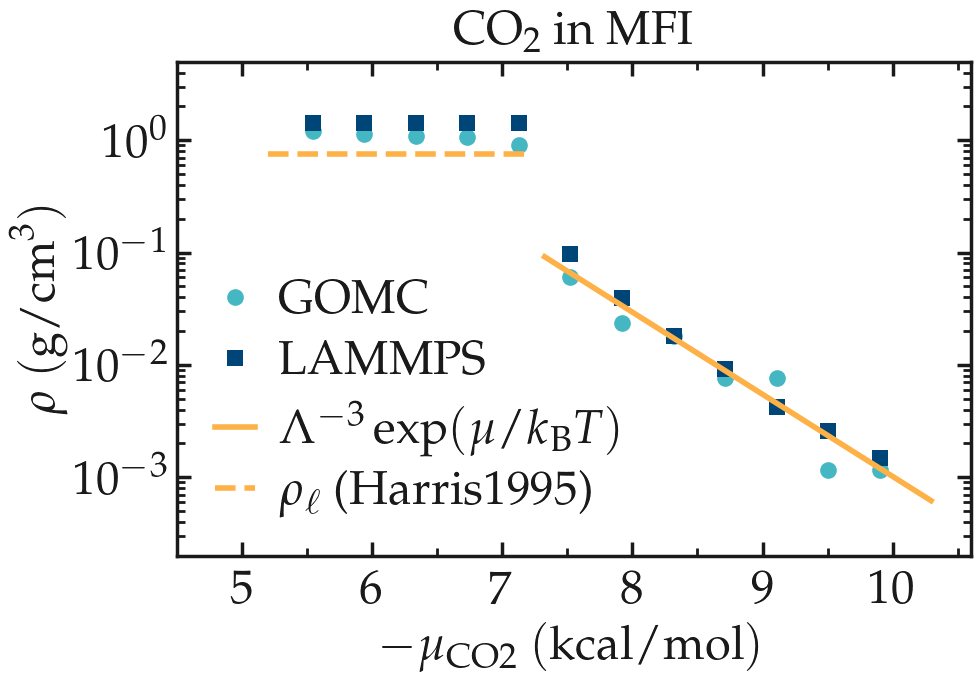

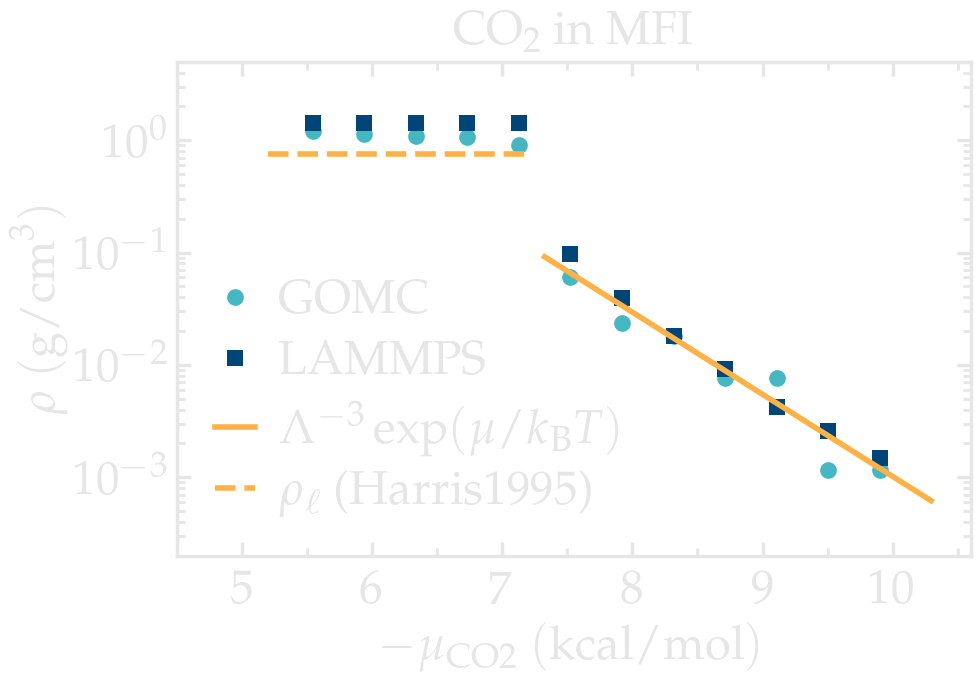

In [11]:
for dark_mode in [False, True]:

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,12), dark_mode = dark_mode,
                         transparency = True, n_colone = 1)
    # Panel 1
    myplt.add_panel(panel_position = [0, 0])
    myplt.add_plot(x = gomc_mu_K.magnitude*0.00198,
                   y = gomc_rho_g_cm3_CO2.magnitude,
                   type = "semilogy",
                   marker = "o", data_color = 0,
                   markersize = 12, data_label = r"$\textrm{GOMC}$")
    myplt.add_plot(x = lammps_mu_K.magnitude*0.00198,
                   y = lammps_rho_g_cm3_CO2.magnitude,
                   type = "semilogy",
                   marker = "s", data_color = 2,
                   markersize = 12, data_label = r"$\textrm{LAMMPS}$")
    myplt.add_plot(x = fit_mu.magnitude*0.00198,
                   y = fit_rho_g_cm3.magnitude,
                   type = "semilogy",
                   marker = "-", data_color = 1,
                   data_label = r"$\Lambda^{-3} \exp(\mu/k_\mathrm{B}T)$")
    myplt.add_plot(x = np.linspace(5.2,7.2),
                   y = np.linspace(5.2,7.2)*0+0.76,
                   type = "semilogy",
                   marker = "--", data_color = 1,
                   data_label = r"$\rho_\ell ~ \textrm{(Harris1995)}$")
    myplt.complete_panel(xlabel = r"$-\mu_\mathrm{CO2} ~ (\textrm{kcal/mol})$",
                         ylabel = r"$\rho ~ (\textrm{g/cm}^3)$",
                         panel_title = r"$\textrm{CO$_2$ in MFI}$",
                         xpad = 10, legend=True)
    myplt.set_boundaries(x_boundaries = (4.5, 10.6), y_boundaries = (2e-4, 5))
    # Finish figure
    myplt.save_figure(filename = "CO2", saving_path = './')

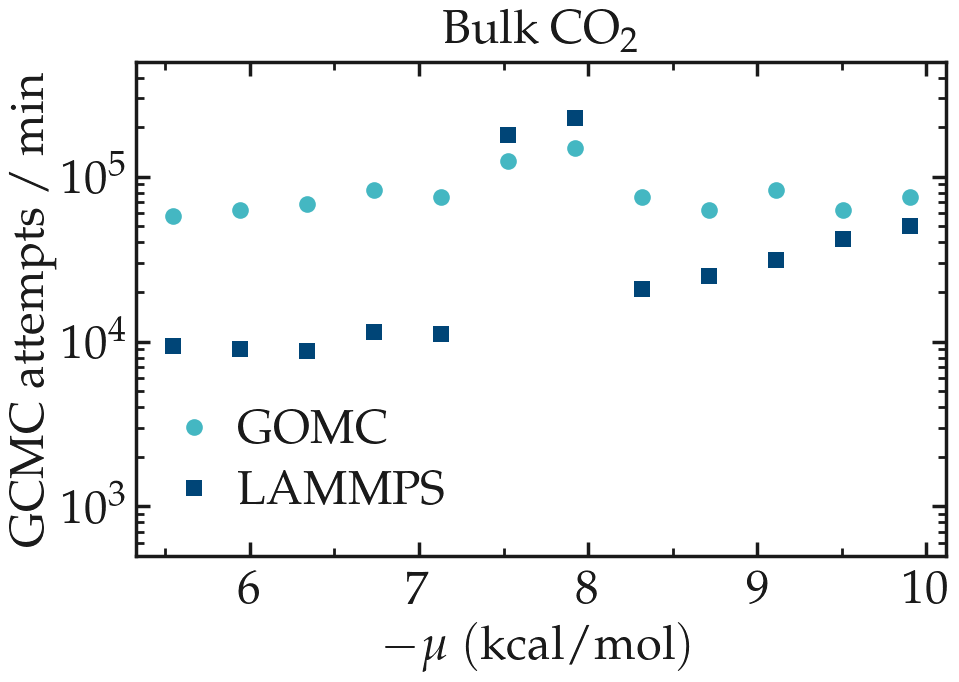

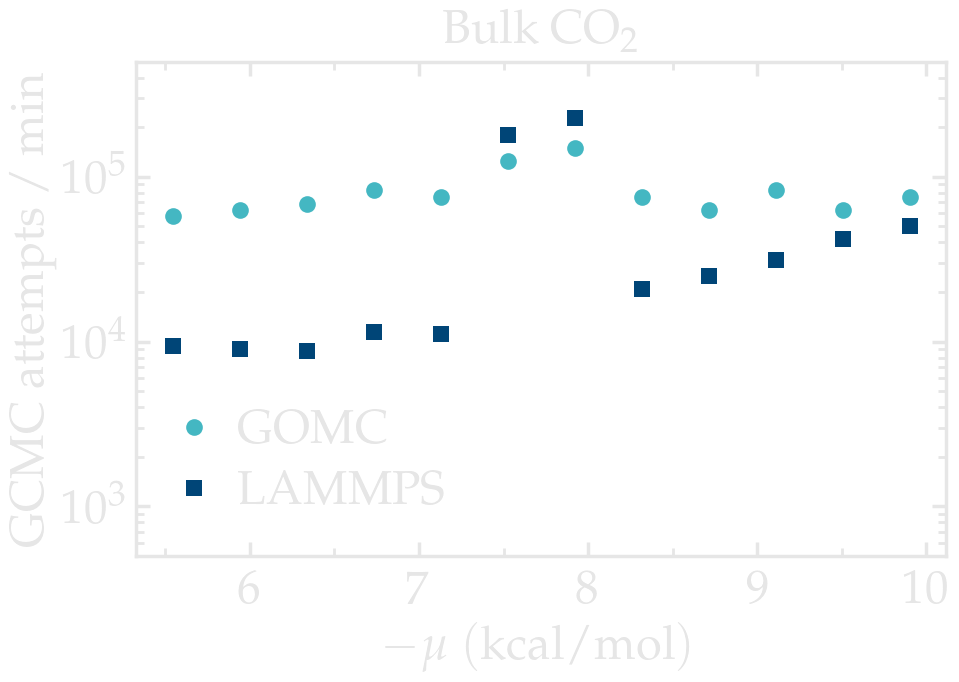

In [13]:
for dark_mode in [False, True]:

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,12), dark_mode = dark_mode,
                         transparency = True, n_colone = 1)
    # Panel 1
    myplt.add_panel(panel_position = [0, 0])
    myplt.add_plot(x = performance_gomc[:,0]*0.00198,
                   y = performance_gomc[:,2]/performance_gomc[:,1],
                   type = "semilogy",
                   marker = "o", data_color = 0,
                   markersize = 12, data_label = r"$\textrm{GOMC}$")
    myplt.add_plot(x = performance_lammps[:,0]*0.00198,
                   y = performance_lammps[:,2]/performance_lammps[:,1],
                   type = "semilogy",
                   marker = "s", data_color = 2,
                   markersize = 12, data_label = r"$\textrm{LAMMPS}$")
    myplt.complete_panel(xlabel = r"$-\mu ~ (\textrm{kcal/mol})$",
                         ylabel = r"$\textrm{GCMC attempts / min}$",
                         panel_title = r"$\textrm{Bulk CO$_2$}$",
                         xpad = 10, legend=True)
    myplt.set_boundaries(y_boundaries = (500, 500000))
    # Finish figure
    # myplt.add_subplotlabels(type_label_panel = "a")
    myplt.save_figure(filename = "CO2-performance", saving_path = './')